# <u>Stock Market data</u>
Data will be fetched by web scraping from https://markets.financialcontent.com/ only. <br>
Companies for which stock price data is fetched-
- <b>Apple (AAPL)
- Google (GOOGL)
- Microsoft (MSFT)</b><br>

Packages used-
- pandas
- numpy
- beautifulsoup4
- urllib.request
- matplotlib
- seaborn

In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request as ur
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings(action='once')

### Function to get the page-source of the company's url
- It gets the page's source by going to the given url and returns it.

In [2]:
def get_page_source(url):
    with ur.urlopen(url) as page_source:
        return page_source.read()

### Function to scrape the page and return the data as a list
- Here all the required data is scraped from the page.<br>
- First it gets the page's source from the url given.<br>
- It converts the page's source to BeautifulSoup object.<br>
- Then it gets the table tag where all the the data is stored.<br>
- It takes the data from each table row and stores them as list.<br>
- It returns the final list.

In [3]:
def scraping(company, mnth, year):
    scrape_data = []
    page_url = "https://markets.financialcontent.com/stocks/quote/historical?Symbol=%s&Month=%d&Year=%d&Range=12"
    source = get_page_source(page_url % (company, mnth, year))
    soup = bs.BeautifulSoup(source, "lxml")
    table_data = soup.find("table", class_="quote_detailed_price_table data").find_all("tr")
    for row in table_data:
        r_data = row.find_all("td")
        scrape_data.append([data.text for data in r_data])
    return scrape_data

### Function to create the DataFrame with the scraped_data
The scraped data is converted to DataFrame with column names:
- Open- The price at which the first share was traded for the current trading day.
- High- The highest price at which the stocks were sold for the current trading day.
- Low- The lowest price at which the stocks were sold for the current trading day.
- Close- The price at which the last share was traded for the current trading day.
- Volume- Is the amount of shares bought/sold of a stock in a given period of time.
- Change(%) - This is the difference between the Last Trading Days Closing Price and the Current Price (Last Price).

In [4]:
def create_dframe(scrape_data):
    return pd.DataFrame(scrape_data, columns=["Date", "Open", "High", "Low", "Close", "Volume", "Change(%)"]).set_index("Date")

### Funtion to store the DataFrame as .csv file
Stores the DataFrame as a .csv file so locally so that work can be done w/o fetching data from url again and again.

In [5]:
def to_csv(frame, name):
    frame.to_csv(f"{name}_data.csv", encoding="utf-8")

In [6]:
abbr = ("AAPL", "GOOGL", "MSFT")
name = ('Apple','Google','Microsoft')

In [7]:
# Store the current date inorder to scrape data of 1 year from current month and year.

dt = datetime.date.today()
mnth = dt.month
year = dt.year

### Get the page-source, create DataFrame and store the data as .csv

In [8]:
for company in abbr:
    scrape_data = scraping(company, mnth, year)
    frame = create_dframe(scrape_data[1:])
    to_csv(frame, company)

### Get the from local storage to do further analysis

In [41]:
apple = pd.read_csv("AAPL_data.csv", index_col="Date", parse_dates=True)
google = pd.read_csv("GOOGL_data.csv", index_col="Date", parse_dates=True)
microsoft = pd.read_csv("MSFT_data.csv", index_col="Date", parse_dates=True)

In [44]:
companies = (apple, google, microsoft)

### Overview of the DataFrame
- Taking a general look at the DataFrame of Google to get the idea of the data.

In [11]:
google.head(25)

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-07-13,1203.0,1210.0,1195.0,1204.0,"1,631,857",+3.16(+0.26%)
2018-07-12,1175.0,1202.0,1173.0,1201.0,"2,206,822",+29.80(+2.54%)
2018-07-11,1156.0,1180.0,1155.0,1171.0,"1,662,268",+4.32(+0.37%)
2018-07-10,1170.0,1174.0,1163.0,1167.0,"1,063,601",-0.14(-0.01%)
2018-07-09,1160.0,1168.0,1157.0,1167.0,"1,078,257",+12.20(+1.06%)
2018-07-06,1142.0,1156.0,1137.0,1155.0,"1,090,967",+13.79(+1.21%)
2018-07-05,1125.0,1144.0,1123.0,1141.0,"1,429,309",+25.01(+2.24%)
2018-07-03,NaN,1116.0,1116.0,1116.0,0,-25.83(-2.26%)
2018-07-02,1115.0,1143.0,1107.0,1142.0,"1,160,915",+12.92(+1.14%)


In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2018-07-13 to 2017-08-02
Data columns (total 6 columns):
Open         222 non-null float64
High         234 non-null float64
Low          233 non-null float64
Close        239 non-null float64
Volume       239 non-null object
Change(%)    239 non-null object
dtypes: float64(4), object(2)
memory usage: 13.1+ KB


- We can see that the DataFrame of Google has some NaN values and  some values with 0.<br>
- The datatype of Volume column in object instead of integer due to comma in b/w the values.<br>
- We need to convert the Volume column to integer and handle the rows with NaN and 0 values for all company DataFrames.

### Converting Volume to integer and handling all unnecessary values
- We first remove the commas from values of Volume column and then convert its  datatype to int.<br>
- Then we fill all the rows with NaN values the latest value for that particular column.<br>
- We replace the 0 value in Volume column with the latest value.<br>
- At last we convert the DataFrame to .csv file to store it in local storage for future reference.

In [13]:
for i in range(3):
    companies[i]["Volume"] = companies[i]["Volume"].str.replace(",", "").astype(int)
    companies[i].fillna(method="ffill", inplace=True)
    companies[i]["Volume"].replace(0, method="ffill", inplace=True)
    companies[i].dropna(how="any", inplace=True)
    to_csv(companies[i], abbr[i])

In [14]:
apple.head()

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-07-12,189.53,191.41,189.31,191.03,18018015,+3.15(+1.68%)
2018-07-11,188.50,189.78,187.61,187.88,18820542,-2.47(-1.30%)
2018-07-10,190.71,191.28,190.18,190.35,15886837,-0.23(-0.12%)
2018-07-09,189.50,190.62,189.30,190.58,19737321,+2.61(+1.39%)
2018-07-06,189.50,188.43,185.20,187.97,17485245,+2.57(+1.39%)


In [15]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2018-07-12 to 2017-08-02
Data columns (total 6 columns):
Open         238 non-null float64
High         238 non-null float64
Low          238 non-null float64
Close        238 non-null float64
Volume       238 non-null int64
Change(%)    238 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 13.0+ KB


In [16]:
# Summary of stats of Apple stock

In [17]:
apple.describe()

,Open,High,Low,Close,Volume
count,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,171.422563,172.756597,170.127857,171.459286,3.022944e+07
std,10.919250,10.877777,11.060981,11.002929,1.248441e+07
min,149.990000,151.830000,149.160000,150.550000,1.402667e+07
25%,162.100000,163.630000,160.025000,161.677500,2.157657e+07
50%,172.100000,173.115000,170.655000,171.850000,2.693858e+07
75%,177.907500,179.390000,176.865000,178.095000,3.549671e+07
max,194.140000,194.200000,192.360000,193.980000,8.659382e+07


### DataFrame to store Opening and Closing stock pirce of all companies
- Storing the Open and Close price of all companies as DataFrame to plot them in one go.

In [18]:
open_price = pd.DataFrame({"AAPL": apple["Open"],
                          "GOOGL": google["Open"],
                          "MSFT": microsoft["Open"]})

In [19]:
close_price = pd.DataFrame({"AAPL": apple["Close"],
                           "GOOGL": google["Close"],
                           "MSFT": microsoft["Close"]})

In [20]:
# Remove all rows with NaN value
open_price.dropna(how="any", inplace=True)
close_price.dropna(how="any", inplace=True)

## <u> Data Representation Of Companies </u>

### Line graph for Open and Close

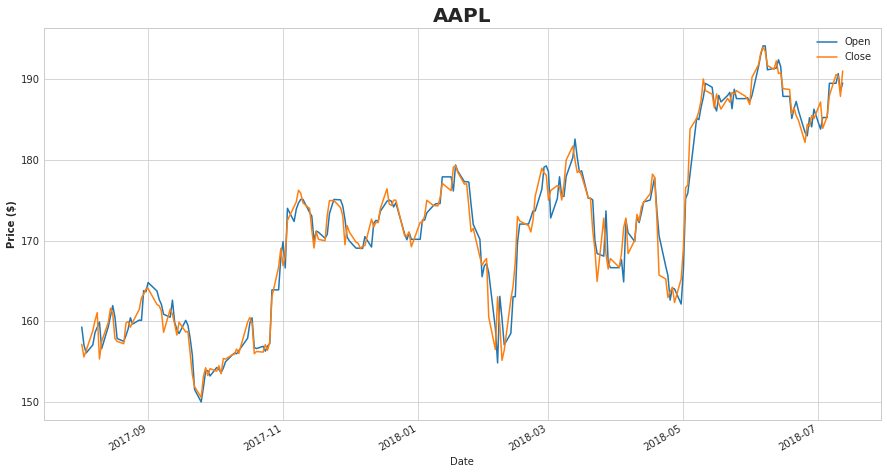

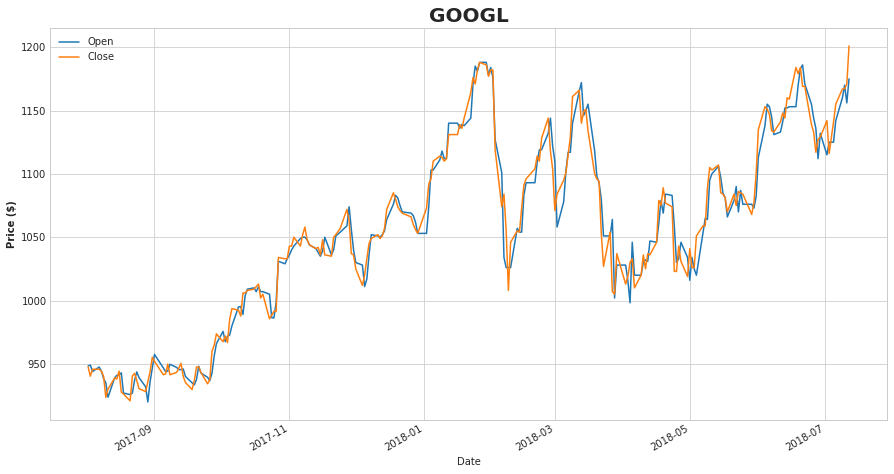

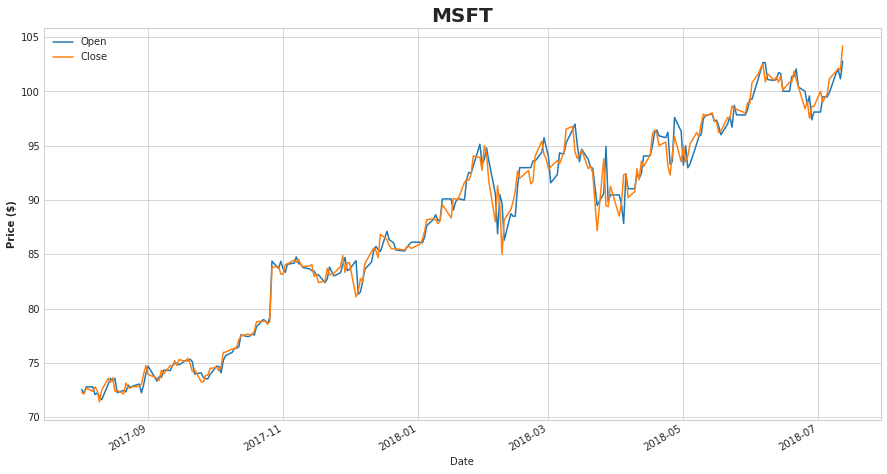

In [21]:
for i in range(3):
    open_price[abbr[i]].plot(grid=True, label="Open")
    close_price[abbr[i]].plot(grid=True, figsize=(15, 8), label="Close")
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.ylabel("Price ($)", fontweight="bold")
    plt.legend()
    plt.show()

From the above graph we can see that for
- <b>Apple</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is very less when compared to other companies.
- <b>Google</b>:<br>
The maximum growth is b/w 2018-01 to 2018-03.<br>
It is having the highest fluctuation in random price.
- <b>Microsoft</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is in b/w the other two companies.

### DataFrame to store total volume of stock being traded each day

In [22]:
volume = pd.DataFrame({"AAPL": apple["Volume"],
                          "GOOGL": google["Volume"],
                          "MSFT": microsoft["Volume"]})

In [23]:
# Droping all the rows w/ NaN values
volume.dropna(how="any", inplace=True)

### Line graph for Volume

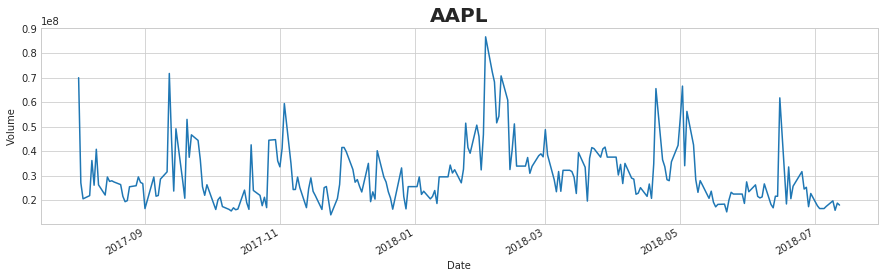

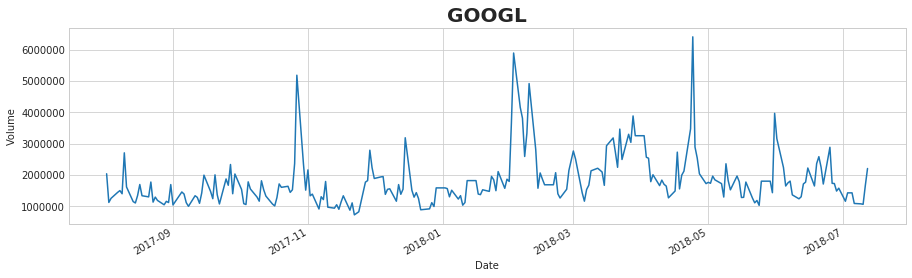

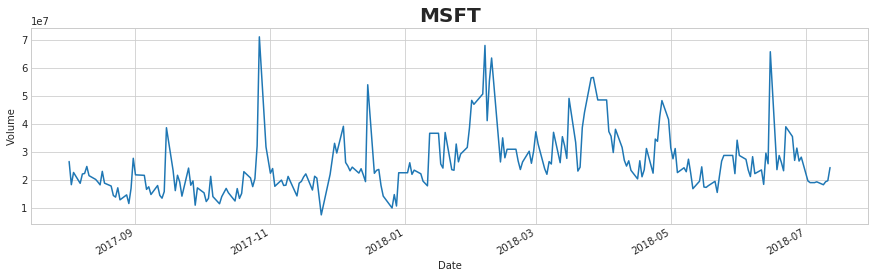

In [24]:
for i in range(3):
    volume[abbr[i]].plot(figsize=(15, 4), grid=True)
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.ylabel("Volume")
    plt.show()

We can see that for:
- <b>Apple</b>: The highest stock being traded was b/w 2018-01 to 2018-03.
- <b>Google</b>: The highest stock being traded was b/w 2018-03 to 2018-05.
- <b>Microsoft</b>: The highest stock being traded was b/w 2017-09 to 2017-11.

### Calculating Daily Returns for all companies
Inorder to analyze the risk of the stock we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the companies stock.

In [25]:
daily_returns = close_price.pct_change()
daily_returns.dropna(how="any", inplace=True)

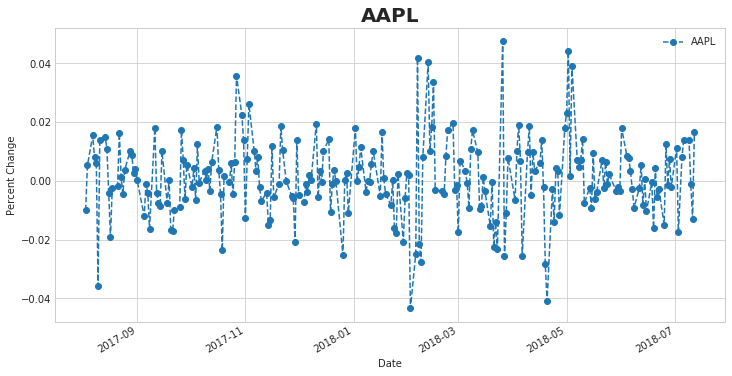

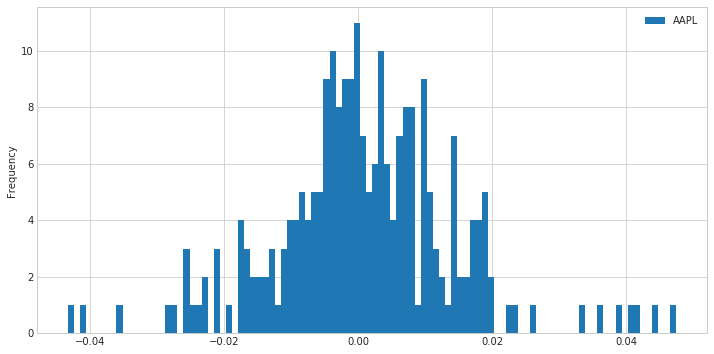

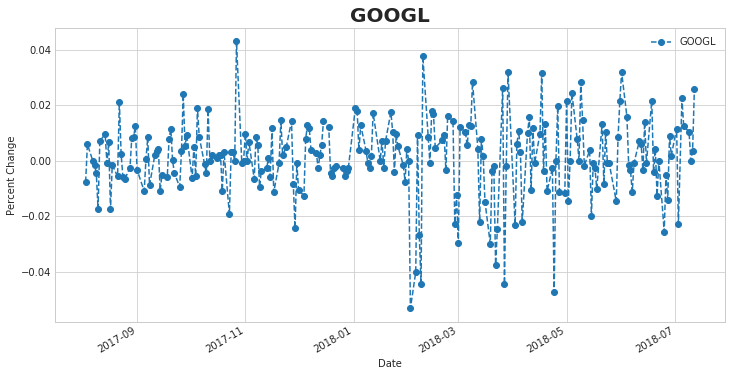

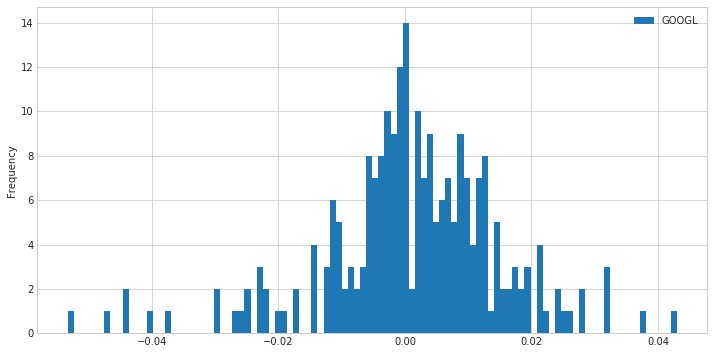

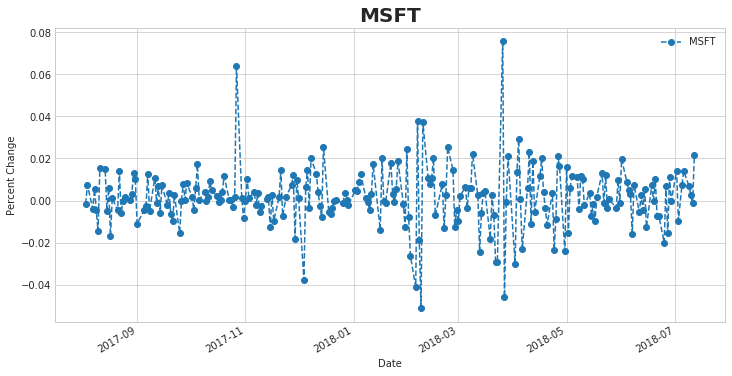

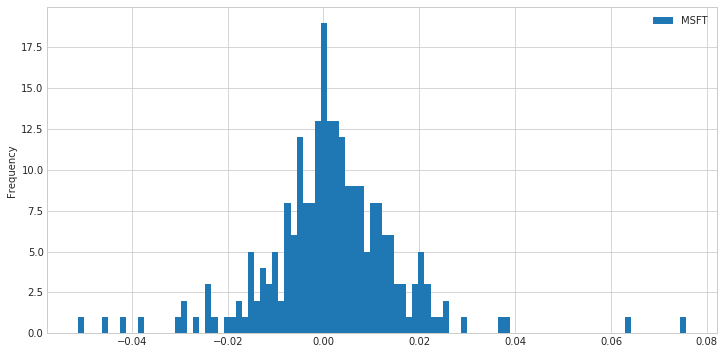

In [26]:
for i in range(3):
    daily_returns[abbr[i]].plot(figsize=(12, 6), grid=True, legend=True, linestyle='--', marker='o')
    plt.ylabel("Percent Change")
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.show()
    daily_returns[abbr[i]].plot.hist(bins=100, figsize=(12, 6), grid=True, legend=True)
    plt.show()

### Correlation b/w companies

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


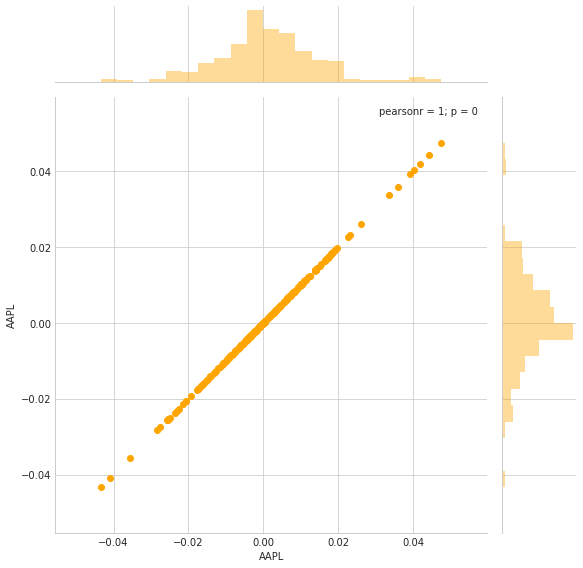

In [27]:
sns.jointplot(daily_returns["AAPL"], daily_returns["AAPL"], daily_returns ,kind='scatter',color='orange', size=8)
plt.show()

- We can see that if stocks of two companies are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. <br>
- So now lets plot the graphs b/w all the companies.

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


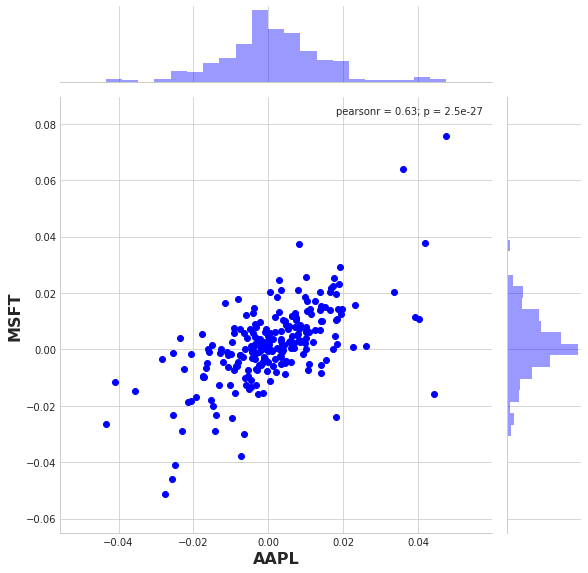

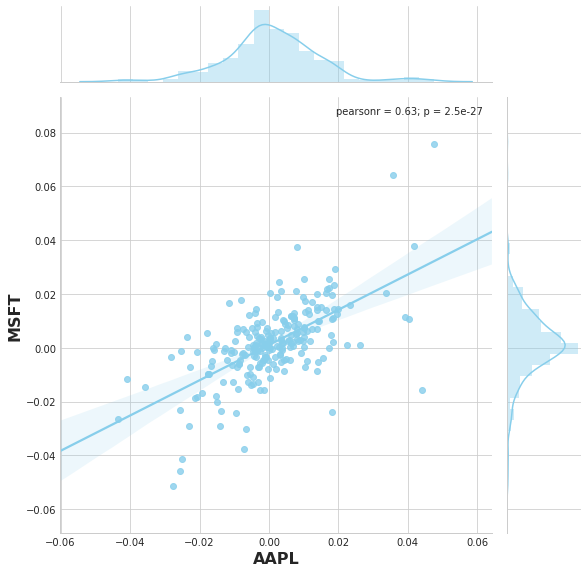

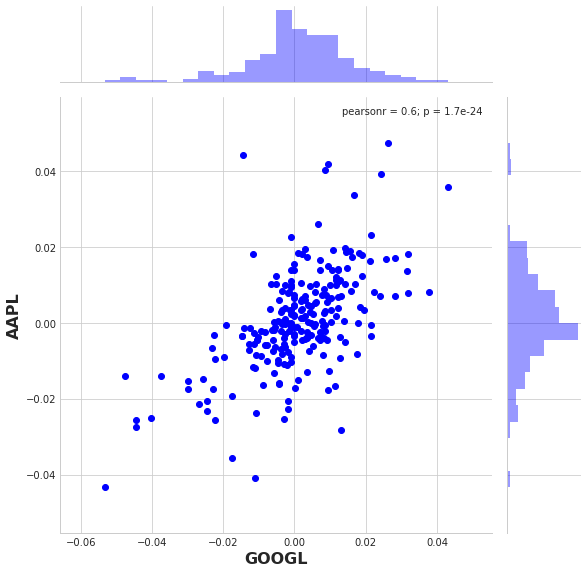

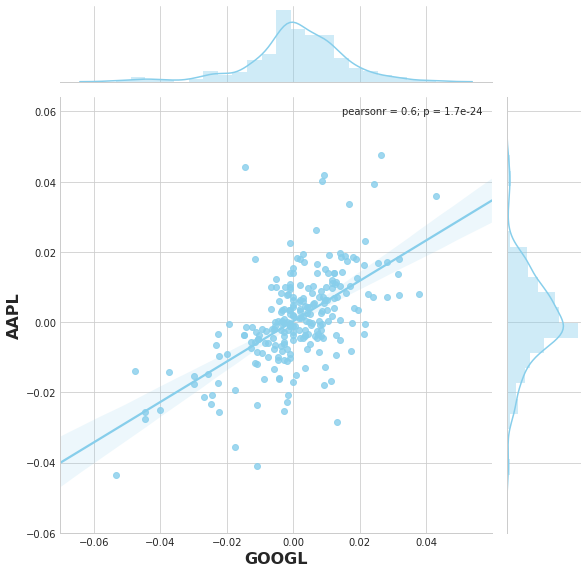

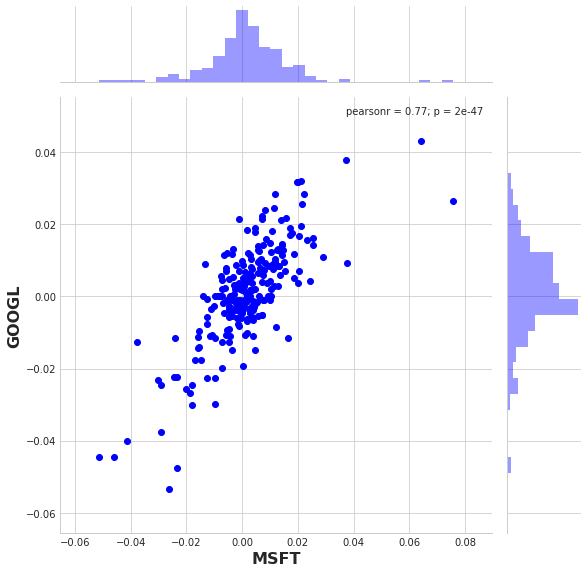

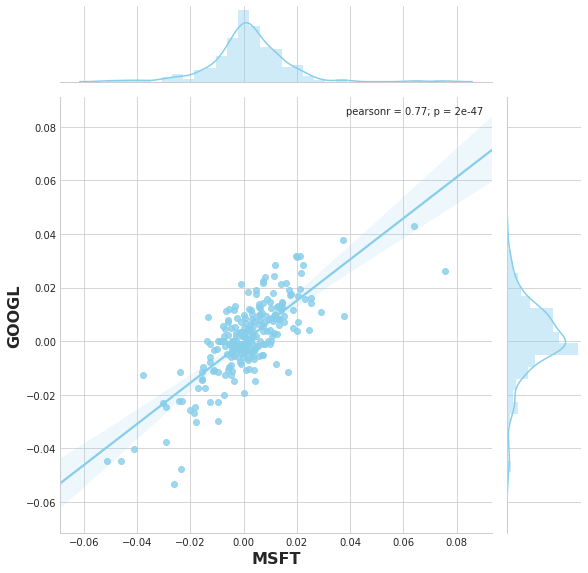

In [28]:
pair = ["MSFT", "AAPL", "GOOGL"]
for i in range(3):
    h = sns.jointplot(daily_returns[abbr[i]], daily_returns[pair[i]], daily_returns ,kind='scatter',color='blue', size=8)
    h.set_axis_labels(abbr[i], pair[i], fontsize=16, fontweight="bold")
    h = sns.jointplot(daily_returns[abbr[i]], daily_returns[pair[i]],daily_returns, kind='reg', size=8, color='skyblue')
    h.set_axis_labels(abbr[i], pair[i], fontsize=16, fontweight="bold")

- From all of the above graphs we can see that all the companies are correlated with eachother from the pearsonr value i.e  Pearson Product-Moment Correlation Coefficient.<br>

## <u>Building Trading Startegies</u>

### Calculating Simple Moving Average(SMA) on all companies
- One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price.<br>
- The idea is quite simple, yet powerful; if we use a (say) 50-day moving average of our price time-series, then a significant portion of the daily price noise will have been "averaged-out". Thus, we can can observe more closely the longer-term behaviour of the asset.
- In Pandas it is quite easy. We can do it rolling() function.

In [29]:
sma_s = close_price.rolling(window=10).mean().dropna(how="any")     # SMA for 10 days
sma_l = close_price.rolling(window=50).mean().dropna(how="any")     # SMA for 50 days

In [31]:
start = str(sma_l.index[0]).split()[0]                              # Date to start plotting

### Plotting SMA for all companies and their Crossovers
- <b>Crossover</b>- The moving average crossover strategy relies on the interaction between two moving averages of different periods.<br>
 - One is a moving average over a short period, and the other is a moving average over a longer period.<br>
 - When the short moving average crosses under the long, this can be interpreted as a <b>negative signal</b> that the market is <b>trending downwards</b>.<br>
 - Conversely if the short moving average crosses over the long, this can be interpreted as a <b>positive signal</b> that the market is <b>trending upwards</b>.

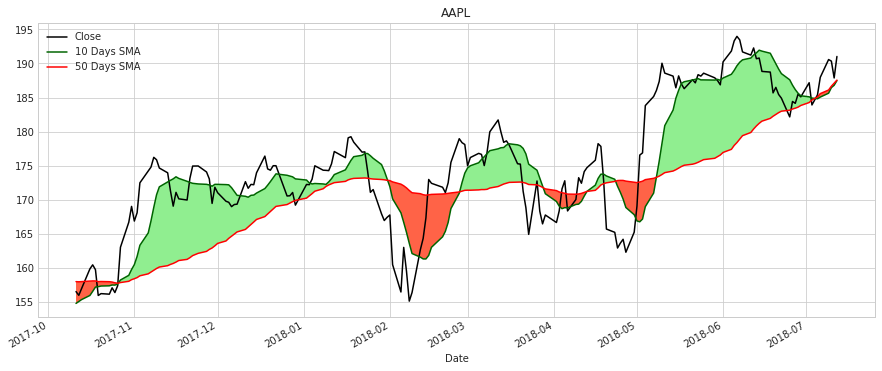

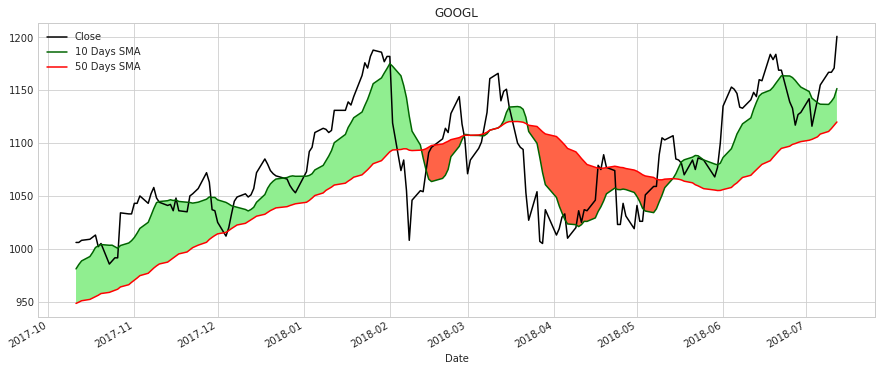

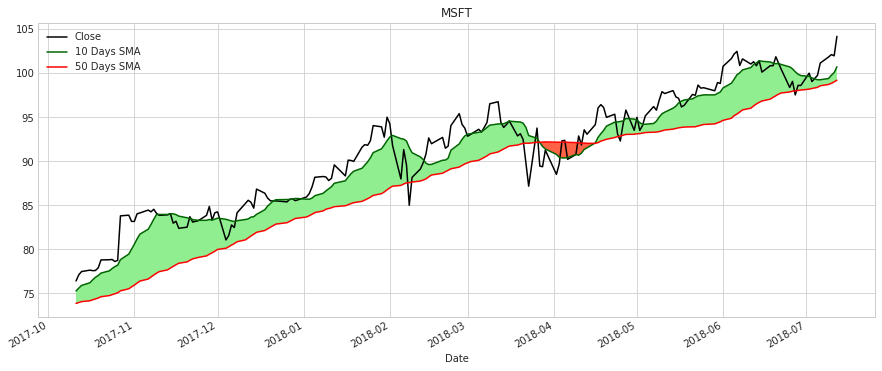

In [32]:
for i in range(3):
    close_price.loc[start:, abbr[i]].plot(x=close_price.loc[start:, abbr[i]].index, label="Close", color="black")
    sma_s.loc[start:, abbr[i]].plot(x=sma_s.loc[start:, abbr[i]].index, label="10 Days SMA", color="darkgreen")
    sma_l.loc[start:, abbr[i]].plot(x=sma_l.loc[start:, abbr[i]].index, label="50 Days SMA", figsize=(15, 6), color="red")
    plt.fill_between(x=sma_l.loc[start:, abbr[i]].index, y1=sma_s.loc[start:, abbr[i]], y2=sma_l.loc[start:, abbr[i]], where=sma_l.loc[start:, abbr[i]] > sma_s.loc[start:, abbr[i]], facecolor='tomato', interpolate=True)
    plt.fill_between(x=sma_l.loc[start:, abbr[i]].index, y1=sma_s.loc[start:, abbr[i]], y2=sma_l.loc[start:, abbr[i]], where=sma_l.loc[start:, abbr[i]] < sma_s.loc[start:, abbr[i]], facecolor='lightgreen', interpolate=True)
    plt.title(abbr[i])
    plt.legend()
    plt.show()

- <b>Green</b> represents the area where SMA for short period over SMA for long period.
- <b>Red</b> represents the area where SMA for short period under SMA for long period.

- It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries.<br> However, this comes at a cost: SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days.
- One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA)
- The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by <b>${1/M}$</b>.
- Using Pandas, calculating the exponential moving average is easy. We need to provide a lag value, from which the decay parameter α is automatically calculated.
- To be able to compare with the short-time SMA we will use a span value of 20.

### Calculating Exponential Moving Averages (EMA)

In [33]:
ema_s = close_price.ewm(span=20, adjust=False).mean()                     # EMA for 20 Days
sma_s = close_price.rolling(window=20).mean().dropna(how="any")           # SMA for 20 Days

In [35]:
start = start = str(sma_s.index[0]).split()[0]

### Plotting EMA

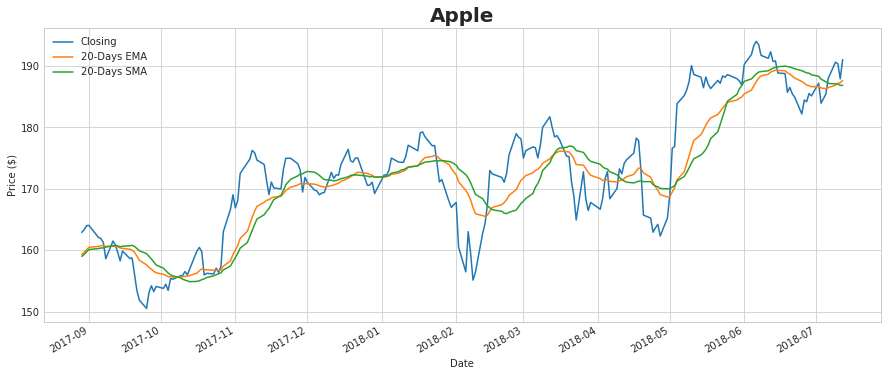

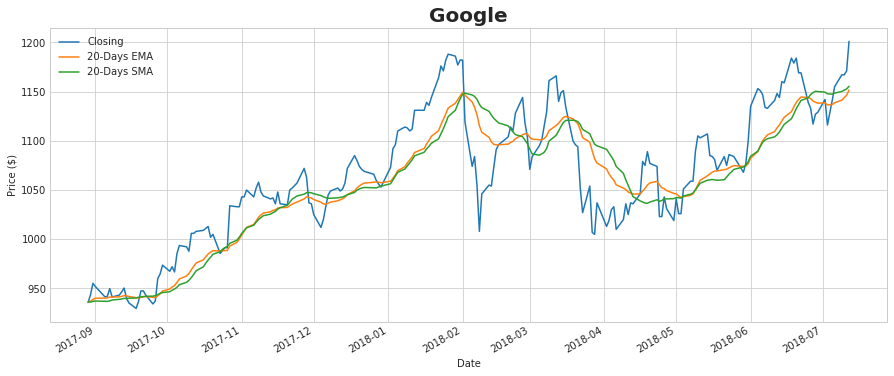

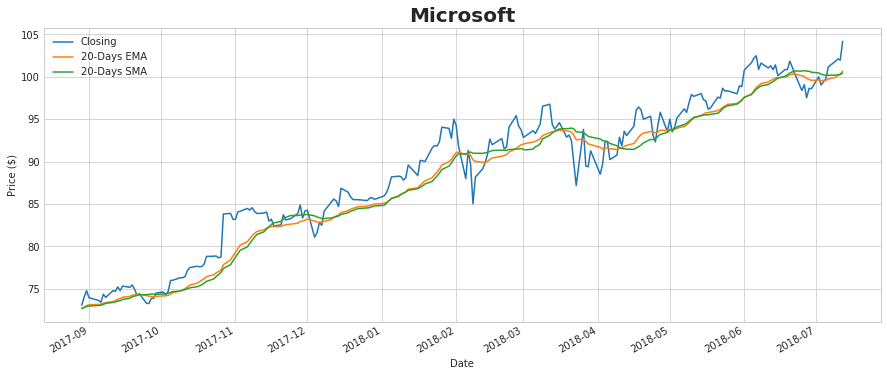

In [36]:
for i in range(3):
    close_price.loc[start:, abbr[i]].plot(x=close_price.loc[start:].index, label="Closing")
    ema_s.loc[start:, abbr[i]].plot(x=sma_l.loc[start:].index, label="20-Days EMA")
    sma_s.loc[start:, abbr[i]].plot(x=sma_s.loc[start:].index,  label="20-Days SMA", grid=True,figsize=(15, 6))
    plt.ylabel("Price ($)")
    plt.title("{}".format(name[i]), fontsize=20, fontweight="bold")
    plt.legend(loc="upper left")
    plt.show()

- A moving average simplifies price data by smoothing it out and creating one flowing line.<br>
- This makes seeing the trend easier.<br>
- Exponential moving averages react quicker to price changes than simple moving averages which can be seen in upper graph.

In [37]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)



                                         Prediction for Apple                                        


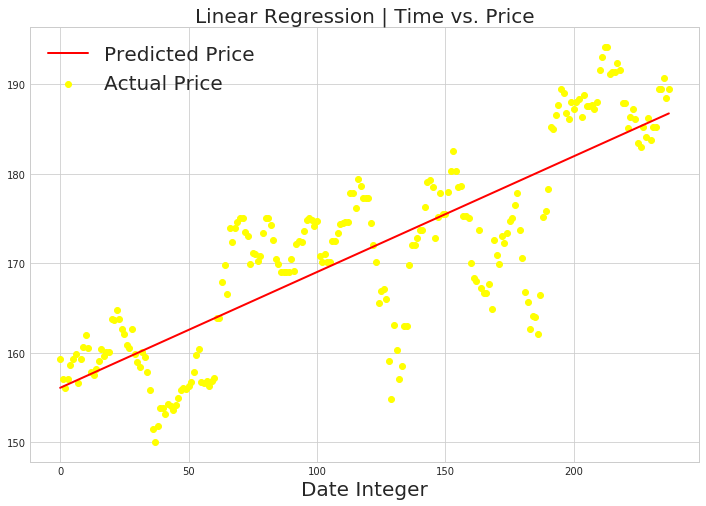

Predicted price : 187.00633044468248
Regression Coefficient : 0.12932587070101598
Regression Intercept : 156.09744734713965

                                        Prediction for Google                                        


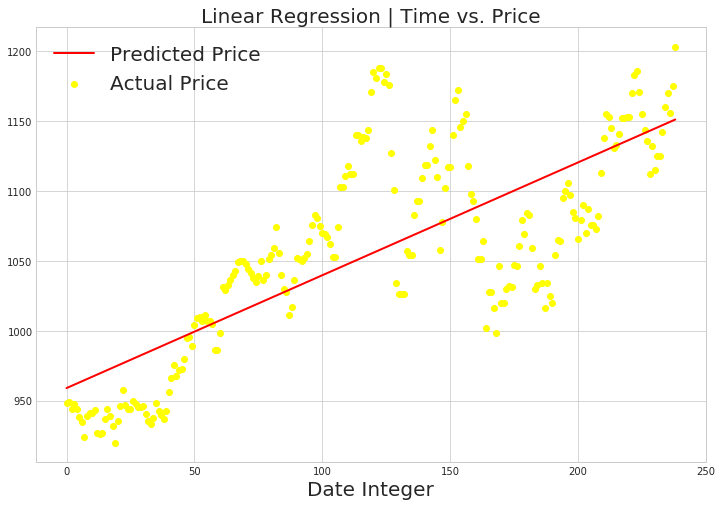

Predicted price : 1152.8116810854049
Regression Coefficient : 0.8078661703174994
Regression Intercept : 958.9238002092051

                                       Prediction for Microsoft                                      


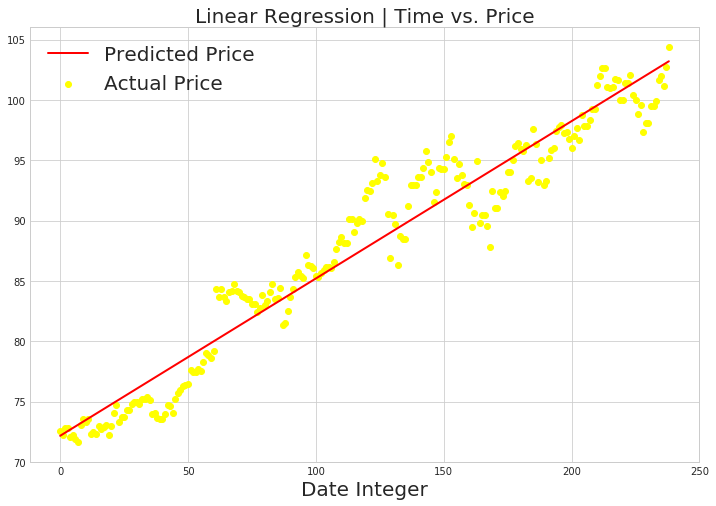

Predicted price : 103.4698529851271
Regression Coefficient : 0.13045212017861538
Regression Intercept : 72.16134414225941


In [52]:
for i in range(3):
    prices = companies[i]['Open']
    dates = list(reversed(range(len(prices))))

    #Convert to 1d Vector
    dates = np.reshape(dates, (len(dates), 1))
    regressor = LinearRegression()
    regressor.fit(dates, prices)
    
    #Visualize Results
    print('\n\033[1m',("Prediction for "+name[i]).center(100))
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.scatter(dates, prices, color='yellow', label= 'Actual Price')    #plotting the initial datapoints
    plt.plot(dates, regressor.predict(dates), color='red', linewidth=2, label = 'Predicted Price')    #plotting the line made by linear regression
    plt.title('Linear Regression | Time vs. Price', fontsize=20)
    plt.legend(loc="upper left", fontsize=20)
    plt.xlabel('Date Integer', fontsize=20)
    plt.show()
 
    #Predict Price on Given Date
    date = len(dates)+1
    predicted_price =regressor.predict(date)
    print("Predicted price :", predicted_price[0])
    print("Regression Coefficient :", regressor.coef_[0])
    print("Regression Intercept :", regressor.intercept_)